## Self Study 9: Logistic Map and Chaos

In past lectures, we have discussed the logistic growth model in continuous time, which describes the growth of populations within the constraints of environmental resources and carrying capacity. This model is characterized by the equation:

$$ 
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$

where $P$ is the population size,$r$ the intrinsic growth rate, and $K$ the carrying capacity.

Now we explore its *discrete* counterpart: the logistic map.

$$
P_{n+1} = rP_n \left(1 - \frac{P_n}{K}\right)
$$

where $P_{n}$ is the population size at time step $n$.
Despite its simplicity, the logistic map exhibits rich behaviors that we might intuitively not expect by simply moving from continous to discrete.

In this exercise, we will assume $K=1$ for simplicity.

## Section 1: From Continuous to Discrete

### Task 1: Logistic Growth as a Continuous Function

Plot the logistic growth function with interactive sliders for $r$ and $P_0$

In [28]:
# plt.style.use('seaborn-v0_8-whitegrid') # uncomment to make plots look nicer

# YOUR CODE HERE
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
import numpy as np


def dP_dt(x,t, r, K=1):
    return r*x*(1-x/K)


@interact(r=(0,10,0.1), x_0=(1,1000,1), n=(1,100,1), K=(1,1000,1))
def plot_logistic_growth(r=1.3, x_0=1, n=10, K=900):
    t = np.linspace(0,n-1,4*n)
    p = odeint(dP_dt, y0=x_0, t=t, args=(r, K))
    plt.figure(figsize=(12,6))
    plt.plot(t,p)
    plt.xlabel('t')
    plt.ylabel('p(t) - Continuous')
    plt.show()



interactive(children=(FloatSlider(value=1.3, description='r', max=10.0), IntSlider(value=1, description='x_0',…

### Task 2: Define Logistic Map and plot its evolution

Define the *recurrence equation* of the logistic map as a function of $P_n$ and $r$. Then plot the evolution of the population size for different values of $r$ and $P_0$.

In [20]:
def logistic_map(x, r, K=1):
    return r*x*(1-x/K)

Define a function that iterates the logistic map for $n$ steps, starting from $P_0$. Note that since it is discrete, we don't use `odeint`, but a for loop.

In [26]:
def logistic_dynamics(P0, r, n):
    """Compute the first n iterations of the logistic map with parameter r
    
    Args:
        P0 (float): initial value
        r (float): parameter
        n (int): number of iterations
    """
    # your code here
    p = np.zeros(n)
    p[0] = P0
    for i in range(1,n):
        p[i] = logistic_map(p[i-1], r)
    return p

@interact(r=(0,4,0.001), p0=(0,1,0.01), n=(5,100,1))
def plot_logistic_map(r=3.56994, p0=0.4, n=20):
    t = np.linspace(0,n-1,n)
    p = logistic_dynamics(p0, r, n)
    plt.figure(figsize=(16,8))
    plt.plot(t, p, 'o-')
    plt.xlabel('t')
    plt.ylabel('p(t)')
    plt.show()

# Make an interactive plot of the logistic map with sliders for r and P0

interactive(children=(FloatSlider(value=3.56994, description='r', max=4.0, step=0.001), FloatSlider(value=0.4,…

**Questions:** What is the fundemental difference in modelling $P_{n+1}$ vs $\frac{dP}{dt}$? What is the difference in the way we solve the two equations?

**Answer:** For the continuous, we simply integrate the dynamics $\frac{dP}{dt}$ to get the values. This is in term an analytical solution. For the discrete modelling we calculate the new time step using the previous time step in discrete time events

**Questions:** What do you observe about the behavior of the logistic map as $r$ increases? What happens when $r$ is greater than 1, 3, 4?

**Answer:** Depending on the initial size, for $r$ greather than 1, we see pretty standard logistic growth. For $r$ greater than 3, we see periodic oscillations up to $r_{\infin} = 3.56994$, for $r$ between $r_{\infin}$ and $4$ we see a mixture of order and chaos. For $r=4$ we see fully developed chaos

**Question:** What happens at $r=3.9$ and $P_0$ changes? 

**Answer:** With $r=3.9$ we see chaos, and a change in initial condition will completely change the outcome for the time interval

## Section 2: Cobweb Plot

Above in the iterative generation of $P_n$ we have done applied the logistic map $f$ to an initial value of $P_0$ repeatedly, creating a sequence such as $ f(P_0), f(f(P_0)), f(f(f(P_0))), \ldots $. This process can be visualised with a cobweb plot.
This is a technique not unique to the logistic map but applicable to any iterative function.
The purpose of the cobweb plot is to understand *how* the function $f$ behaves as it is iteratively applied to its own output.


Here's a step by step explanation of the construction of a cobweb plot:

1. Plot the function $f(x) $.
2. Plot the identity line $y = x$.
3. Start at the initial point $(x_0, x_0)$ located on the identity line.
4. Vertical move: From $(x_0, x_0)$, draw a vertical line to $(x_0, f(x_0))$. This step represents the application of the function $f$ to the initial value.
5. Horizontal move: Next, draw a horizontal line from $(x_0, f(x_0))$ to $(f(x_0), f(x_0))$ updating the input value to $x_1 = y_0 = f(x_0)$.
6. Repeat the vertical and horizontal movements.


I provide most of the code for the cobweb plot below. You have to add the two lines:

1) plot the *vertical* move: $(x_n, x_n)$ to $(x_n, y_n)$
2) plot the *horizontal* move: $(x_n, y_n)$ to $(y_n, y_n)$.

Where $y_n = f(x_n)$.

In [30]:
import matplotlib.pyplot as plt
import numpy as np


def annotate_point(ax, x, y, text, xytext=(0, 0)):
    """
    Annotate a point on a matplotlib axis.
    """
    ax.annotate(text,
                    xy=(x, y), xycoords='data',
                    xytext=xytext, textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc3,rad=.2"))


def plot_cobweb(f, x0, n, show_annotation=True, **f_kwargs):
    """
    Plot the cobweb plot for a function f, starting point x0, and number of steps n.
    
    Args:
        f (function): Function of the form f(x, **f_kwargs), where x is a float and f_kwargs are additional keyword arguments.
        x0 (float): Initial value.
        n (int): Number of iterations.
        show_annotation (bool): Whether to show annotations for the first iteration.
        **f_kwargs: Additional keyword arguments to pass to f.
    """
    # Initialize figure
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    # Plot y = f(x) and y = x
    x = np.linspace(0, 1, 500)
    y = f(x, **f_kwargs)
    ax.plot(x, y, 'blue', lw=1, label='$f$')
    ax.plot(x, x, 'gray', lw=.5, label='Identity line', linestyle='dashed')
    
    x_n = x0
    for i in range(n):
        y_n = f(x_n, **f_kwargs)
        
        # 1. Plot vertical move. Use ax.plot
        ## YOUR CODE HERE
        ax.plot([x_n, x_n], [x_n, y_n], 'r-')
        # 2. Plot horizontal move
        ## YOUR CODE HERE
        ax.plot([x_n, y_n], [y_n, y_n], 'r-')
        
        # Annotate first iteration
        if i == 0 and show_annotation:
            ax.plot([x0], [x0], 'ok')
            annotate_point(ax, x0, x0, f'Initial Point\n$(x_0, x_0)$', xytext=(-50, 30))
            annotate_point(ax, x_n, y_n, f'Apply $f$\n$(x_0, f(x_0))$', xytext=(-50, 10))
            annotate_point(ax, y_n, y_n, f'First iteration\n$(f(x_0), f(x_0))$', xytext=(-50, -50))
        
        # Update the point
        x_n = y_n

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    
    # turn off grid
    ax.grid(False)
    
    # Display the plot
    plt.show()

# Plot cobweb plot for logistic map with r=2.6 and x0=0.2, for 100 iterations
@interact
def plot_cw(r=(.5, 4.1, .1,), x0=(0.01, 1., 0.05), n=(0, 50, 1), show_annotation=True):
    plot_cobweb(f=logistic_map, n=n, x0=x0, show_annotation=show_annotation, r=r)


interactive(children=(FloatSlider(value=2.2, description='r', max=4.1, min=0.5), FloatSlider(value=0.46, descr…

### Task 1: Explore the parameters of the cobweb plot of the logistic map

**Question:** What do you observe in the cobweb plot as $r$ increases? What happens when $r$ is greater than 1, 3, 4? Why does this happen, graphically?

**Answer:**

**Question:** What happens at $r>4$? Looking at $f(x)$ what is the intuition for why higher values behave this way? **Hint:** Keep the iterations low i.e., $n<5$ to be able to see the behavior.  

**Answer:** The maxima of dP_dt goes above 1 and evaluating a value greater than 1 in the function yields a negative number which moves vertically to the bottom left quadrant and from there it's all negative

### Task 2: Apply the cobweb plot to other functions

Define two functions (one linear one "complex") and visualize how the cobweb evolves.

**Question:** How does your function behave differently from the logistic map? Why?

**Answer:**

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0), FloatSlider(value=2.0, description='b'…

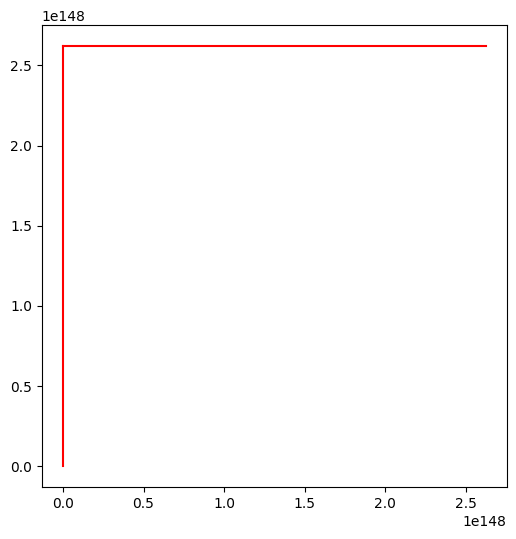

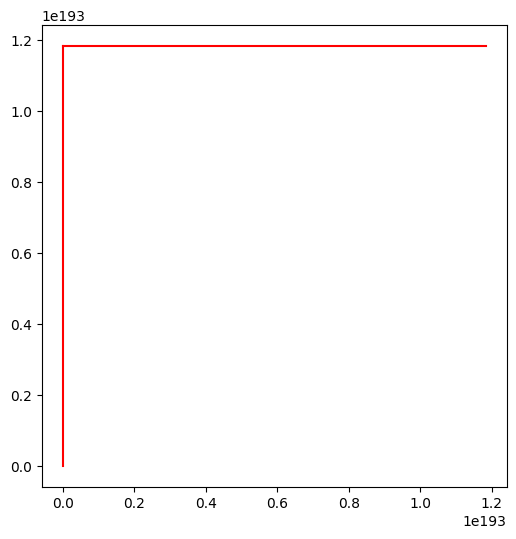

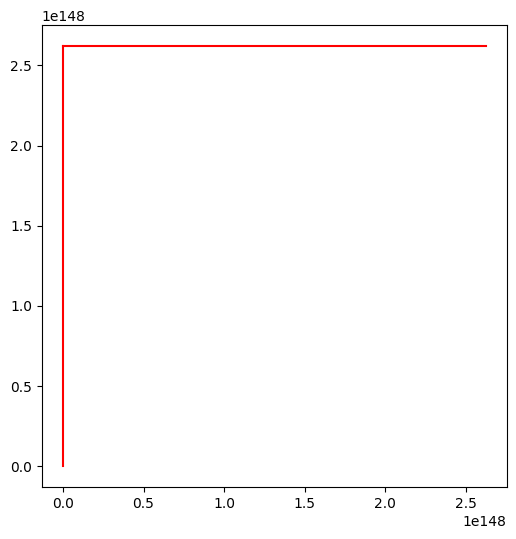

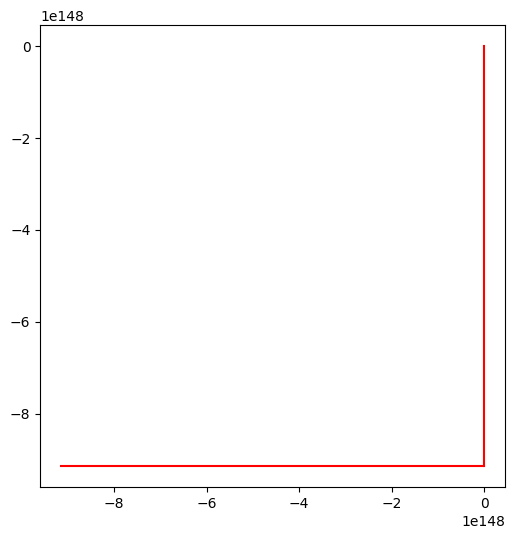

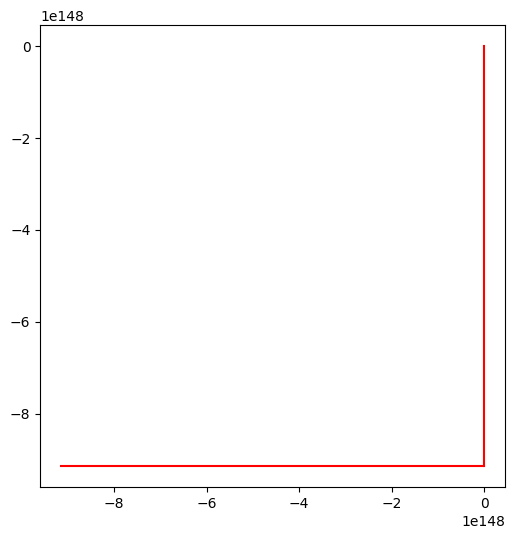

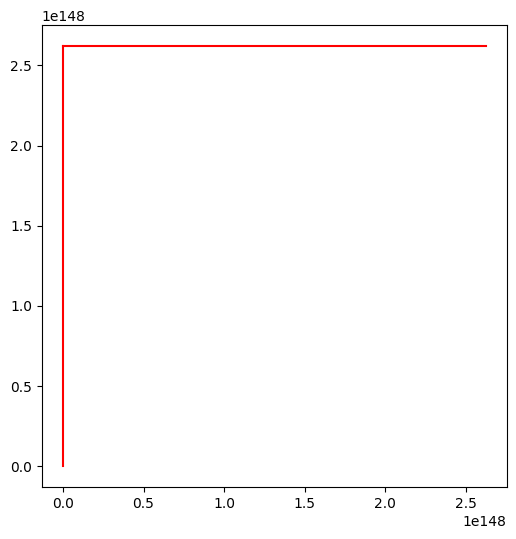

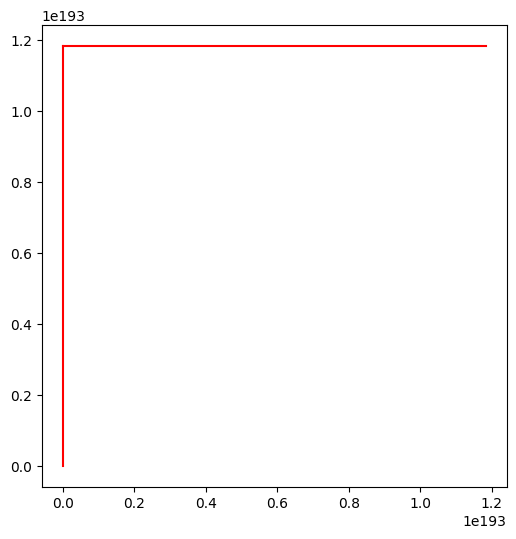

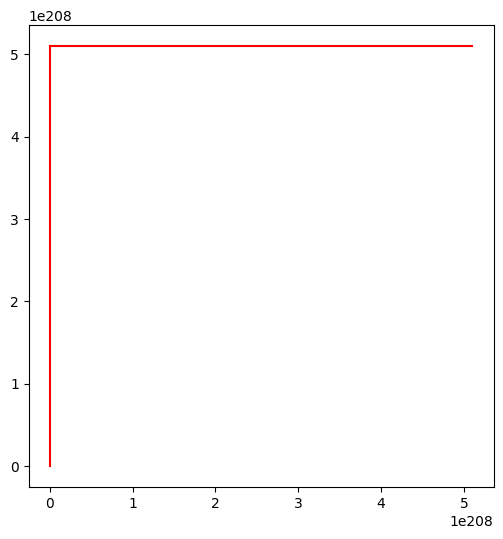

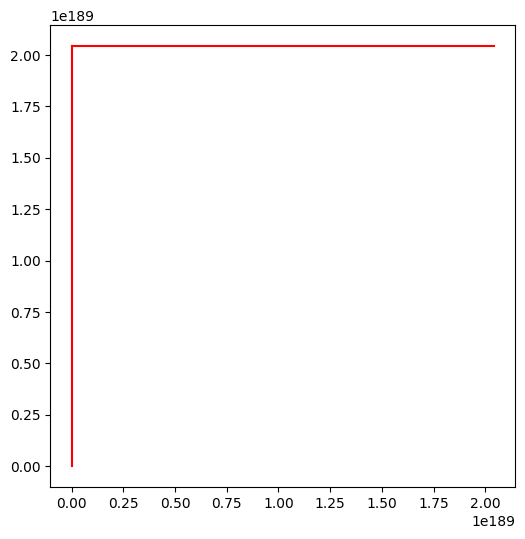

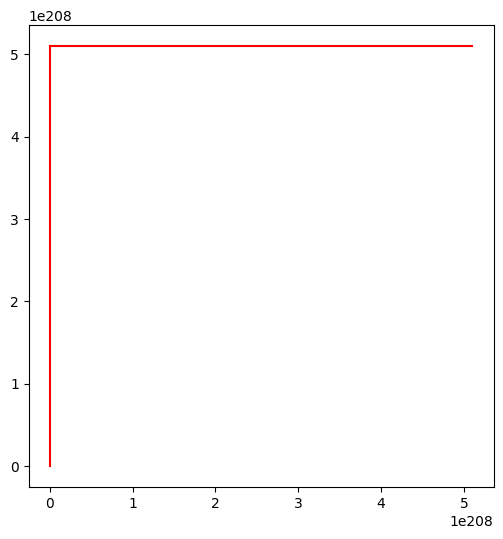

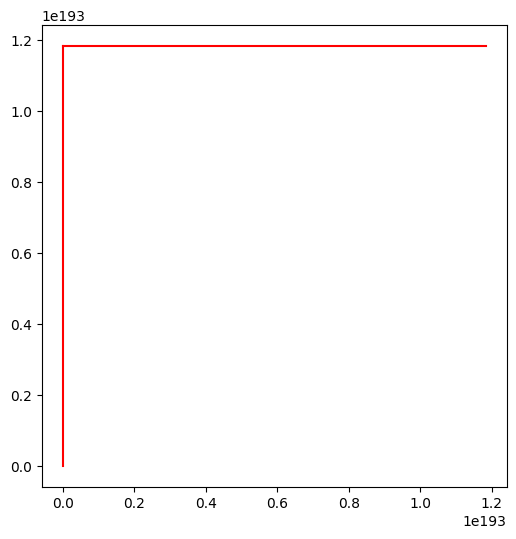

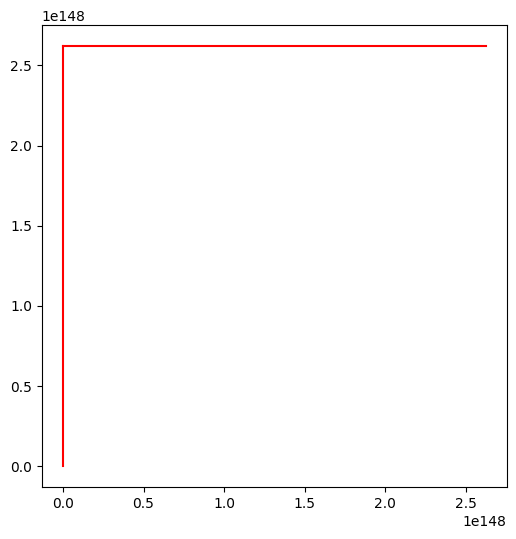

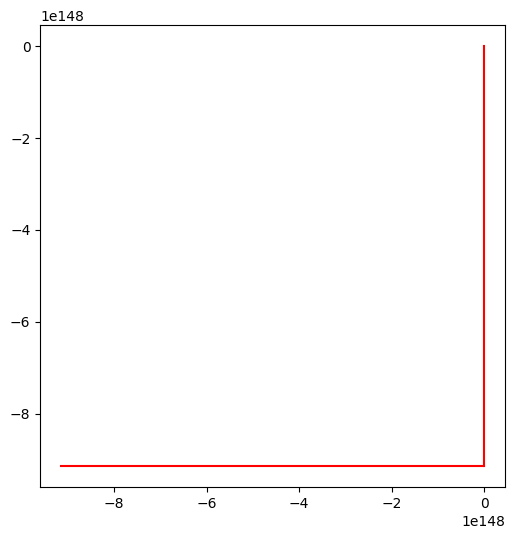

In [40]:
# your function here

def other_fun(x, a=4.8, b=3.6):
    return a*x**2-b*x**3

def lin_fun(x, A=2, alpha=0.4, K=100, L= 200):
    return A*K**alpha * L**(1-alpha)
    

# look at example above how to plot cobweb for your functions

@interact
def plot_cw(a=(0, 5, .1,), b=(0,4,0.1),  x0=(0, 1.1, .1), n=(0, 50, 1), show_annotation=False):
    plot_cobweb(f=other_fun, n=n, x0=x0, show_annotation=show_annotation, a=a, b=b)


## Section 3: Bifurcation Diagram

For the logistic map, the bifuraction diagram depicts the long-term values at which the system settles for each value of the growth rate parameter $ r $. The diagram is constructed by iterating the logistic map for a range of values of $ r $.

Here is a step-by-step description of how to construct a bifurcation diagram for the logistic map:

1. Write a function that for a given $r$ and $P_0$ iterates the logistic map for $n$ steps and returns the last $m$ values of $P$. By taking only the last $m$ values, we are ignoring the transient behavior of the system.
2. For $2.5<r<4$ iterate this function and store the last $m$ values of $P$.
3. Plot $r$ on the x-axis and the list of $P$ values on the y-axis, i.e., the bifurcation diagram.

In [45]:
def logistic_dynamics(P0, r, n, m):
    """Generate and and return the last m iterations of the logistic map.
    
    Args:
        P0 (float): initial value
        r (float): parameter
        n (int): number of iterations
        m (int): number of final iterations to return
    
    Returns:
        array or list of final m P values
    """
    # your code here
    m_values = []
    value = P0
    for i in range(n):
        value = logistic_map(value, r)
        if i>=n-m:
            m_values.append(value)
    return m_values

print(logistic_dynamics(0.3, 3.4, 50, 5))

[0.4520492857163886, 0.842182478598951, 0.45189791455558664, 0.8421330438780544, 0.45201293297490674]


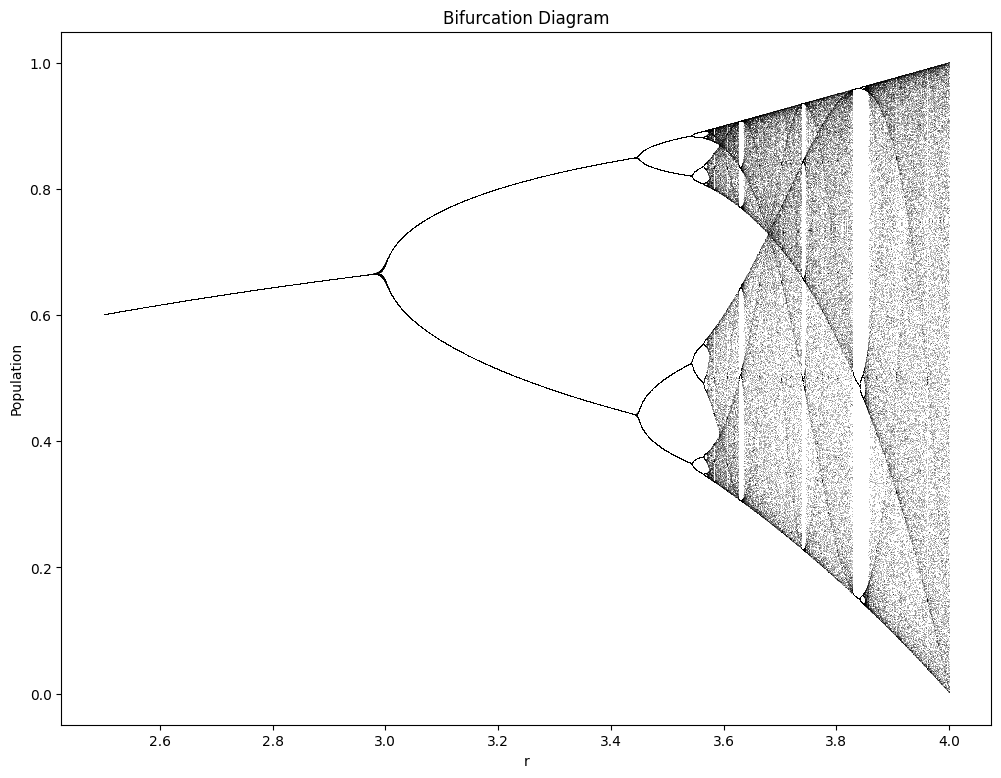

In [54]:
def plot_bifurcation(r_values, P0, n, m):
    """
    Plot the bifurcation diagram for the logistic map.
    
    Parameters:
        r_values (array-like): An array of r values to iterate over.
        P0 (float): The initial population size.
        n (int): The total number of iterations per r value.
        last (int): The number of iterations to plot to show long-term behavior.
    """
    # Initialize the array to hold the data points to plot
    r_points = [] # this be a list of r values corresponding to the P_points
    P_points = [] # this will be a list of P values corresponding to the r_points

    # Loop over the r values
    for r in r_values:
        # obtain the last m iterations of the logistic map for a given r 
        P = logistic_dynamics(P0, r, n, m)# your code here
        
        r_points.extend([r] * m) # add r to the r_points list "m" times
        P_points.extend(P)
    
    # Plot the bifurcation diagram
    plt.figure(figsize=(12, 9))
    plt.plot(r_points, P_points, ',k', alpha=0.25)
    plt.title("Bifurcation Diagram")
    plt.xlabel('r')
    plt.ylabel('Population')
    plt.show()


r_values = np.linspace(2.5, 4.0, 4000)
plot_bifurcation(r_values, P0=0.1, n=300, m=100)


**Question:** What do you observe in the bifurcation diagram as $ r $ increases? What happens when $ r $ is greater than 2.6, 3.2, 3.5, and 3.9? What happens there in terms of "stability"?

**Answer:** 

**Question:** How is this bifurcation diagram different from bifurcation diagrams for continuous systems we have seen in the past?

**Answer:** 